In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
    
def load_join(select, loaded):
    selected_df = pd.read_csv("https://www.dropbox.com/s/" + select + "?dl=1", index_col="review_index")
    if loaded is not None:
        selected_df = pd.merge(loaded, selected_df, on='review_index')
    return selected_df

In [19]:
load_metadata = True
load_ratings = True
load_opinions = True
load_descriptions = False

working_df = None
if load_metadata == True:
    load_index = "goqyfyeu2qvpsmo/metadata_df"
    working_df = load_join(load_index, working_df)
if load_ratings == True:
    load_index = "9j2j86xwqrmrljx/ratings_df.csv"
    working_df = load_join(load_index, working_df)
if load_opinions == True:
    load_index = "q8v9f6rbb4z12df/opinion_df.csv"
    working_df = load_join(load_index, working_df)
if load_descriptions == True:
    load_index = "hnp8sebleh6dzgt/descriptions_df.csv"
    working_df = load_join(load_index, working_df)
    

In [20]:
working_df.head()

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook
review_index,,,,,,,,,,,,,,,
0,AFH-Wealth-Management,2015-04-05,,Current Employee,NaN,2,4.0,3.0,NaN,2.0,3.0,3.0,x,o,r
1,AFH-Wealth-Management,2015-12-11,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",2,3.0,1.0,NaN,2.0,1.0,4.0,x,o,r
2,AFH-Wealth-Management,2016-01-28,Office Administrator,"Current Employee, less than 1 year","Bromsgrove, England, England",1,1.0,1.0,NaN,1.0,1.0,1.0,x,o,x
3,AFH-Wealth-Management,2016-04-16,,Current Employee,NaN,5,2.0,3.0,NaN,2.0,2.0,3.0,x,o,r
4,AFH-Wealth-Management,2016-04-23,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",1,2.0,1.0,NaN,2.0,1.0,1.0,x,o,x


In [21]:
#Clean up dataframe to remove any excess information 
cleanfactors = working_df.drop(columns=['work_life_balance', 'culture_values', 'diversity_inclusion', 'recommend', 'ceo_approv', 'outlook'])
cleanfactors

,firm,date_review,job_title,current,location,overall_rating,career_opp,comp_benefits,senior_mgmt
review_index,,,,,,,,,
0,AFH-Wealth-Management,2015-04-05,,Current Employee,NaN,2,2.0,3.0,3.0
1,AFH-Wealth-Management,2015-12-11,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",2,2.0,1.0,4.0
2,AFH-Wealth-Management,2016-01-28,Office Administrator,"Current Employee, less than 1 year","Bromsgrove, England, England",1,1.0,1.0,1.0
3,AFH-Wealth-Management,2016-04-16,,Current Employee,NaN,5,2.0,2.0,3.0
4,AFH-Wealth-Management,2016-04-23,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",1,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
838561,the-LEGO-Group,2021-06-02,Marketing Manager,"Current Employee, more than 5 years","München, Bavaria, Bavaria",5,4.0,4.0,4.0
838562,the-LEGO-Group,2021-06-03,Sales Associate,"Current Employee, less than 1 year","London, England, England",3,NaN,NaN,NaN
838563,the-LEGO-Group,2021-06-03,Strategist,Current Employee,NaN,4,3.0,5.0,3.0


In [25]:
cleanfactors.count()

firm              838566
date_review       838566
job_title         838566
current           838566
location          541228
overall_rating    838566
career_opp        691065
comp_benefits     688484
senior_mgmt       682690
dtype: int64

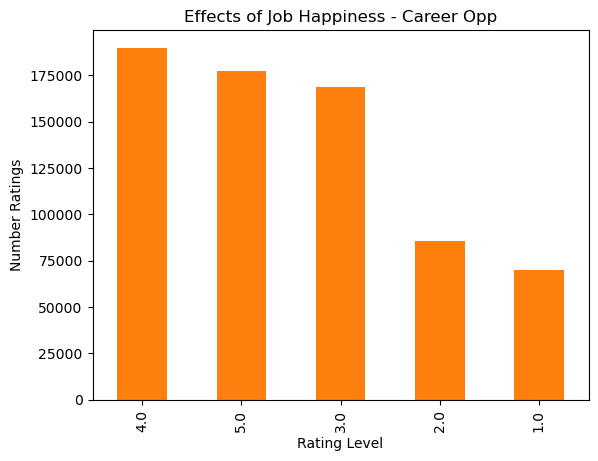

In [35]:
Factors_count = cleanfactors["career_opp"].value_counts()

plot_pandas = Factors_count.plot.bar(color='tab:orange')

plt.xlabel("Rating Level")
plt.ylabel("Number Ratings")
plt.title("Effects of Job Happiness - Career Opp")

plt.show()

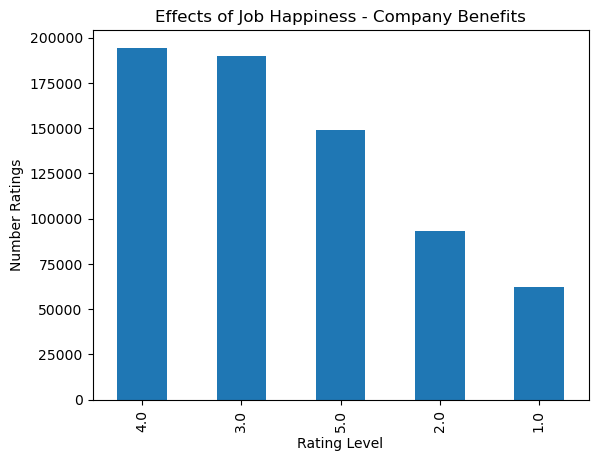

In [37]:
Factors_count = cleanfactors["comp_benefits"].value_counts()

plot_pandas = Factors_count.plot.bar(color='tab:blue')

plt.xlabel("Rating Level")
plt.ylabel("Number Ratings")
plt.title("Effects of Job Happiness - Company Benefits")

plt.show()

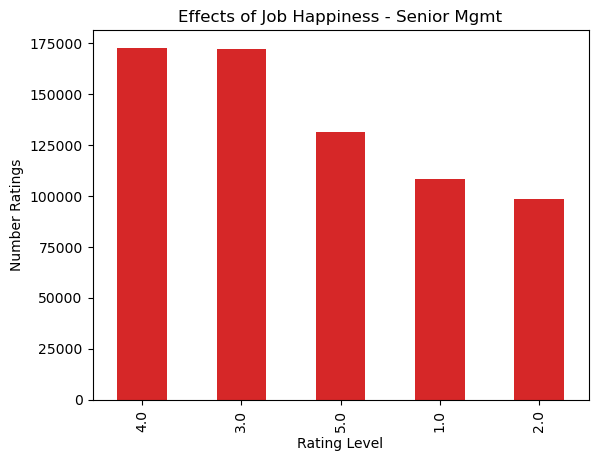

In [38]:
Factors_count = cleanfactors["senior_mgmt"].value_counts()

plot_pandas = Factors_count.plot.bar(color='tab:red')

plt.xlabel("Rating Level")
plt.ylabel("Number Ratings")
plt.title("Effects of Job Happiness - Senior Mgmt")

plt.show()

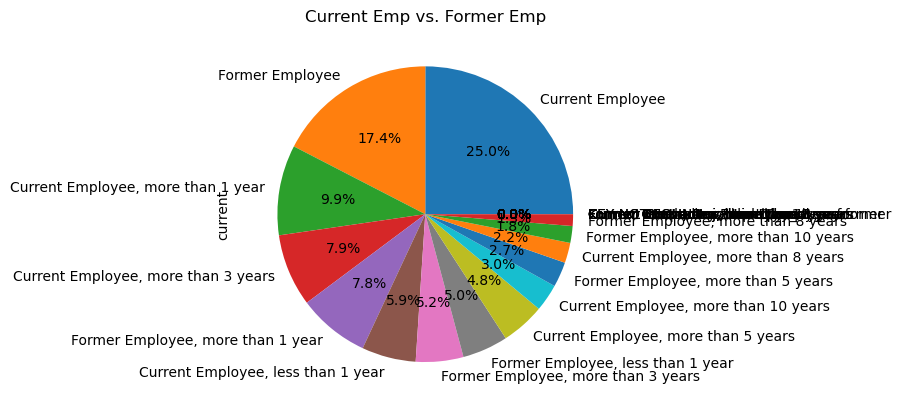

In [47]:
Employee_data = cleanfactors["current"].value_counts()
Employee_data.plot.pie(autopct= "%1.1f%%")
plt.title("Current Emp vs. Former Emp")
plt.show()